<a href="https://colab.research.google.com/github/handsome1201/Big_Data/blob/main/ML_11_201802156_%EC%A0%95%ED%98%84%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def convert(imgf,labelf,outf,n):
  f = open(imgf,"rb")
  o = open(outf,"w")
  l = open(labelf,"rb")

  f.read(16)
  l.read(8)
  images = []

  for i in range(n):
    image = [ord(l.read(1))]
    for j in range(28*28): 
      image.append(ord(f.read(1)))
    images.append(image)

  for image in images:
    o.write(",".join(str(pix) for pix in image)+"\n")
  
  f.close()
  o.close()
  l.close()

In [ ]:
convert("/content/drive/MyDrive/기계학습/train-images.idx3-ubyte","/content/drive/MyDrive/기계학습/train-labels.idx1-ubyte","mnist_train.csv",60000)
convert("/content/drive/MyDrive/기계학습/t10k-images.idx3-ubyte","/content/drive/MyDrive/기계학습/t10k-labels.idx1-ubyte","mnist_test.csv",10000)

In [ ]:
import pandas as pd
import numpy as np
import sklearn.neural_network as neural_network

In [ ]:
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

In [ ]:
column_name=[]
for i in range(len(train_df.columns)):
  if i==0:
    column_name.append('label')
  else:
    column_name.append('feats_'+str(i))

train_df.columns=column_name
test_df.columns=column_name

In [ ]:
train_df.to_csv("mnist_train_final.csv",index=False)
test_df.to_csv("mnist_test_final.csv",index=False)

In [ ]:
X_train=train_df
Y_test=test_df

In [ ]:
from sklearn.model_selection import train_test_split

features = X_train.iloc[:, 1:]
labels = X_train.iloc[:, 0]
features=features/255
train_feats, test_feats, train_labels, test_labels = train_test_split(features, labels, test_size=0.2,random_state=0)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import data

model1 = MLPClassifier(hidden_layer_sizes=(200,100),solver='adam',warm_start=True, max_iter=1,learning_rate_init=0.01,verbose=True)
model2 = MLPClassifier(hidden_layer_sizes=(200,100),solver='adam',warm_start=True, max_iter=1,learning_rate_init=1,verbose=True)

In [ ]:
N_EPOCHS = 20
scores_train1 = []
scores_test1 = []
scores_train2 = []
scores_test2 = []
epoch = 0
while epoch < N_EPOCHS:
  model1.fit(train_feats,train_labels)
  scores_train1.append(model1.score(train_feats,train_labels))
  scores_test1.append(model1.score(test_feats,test_labels))
  model2.fit(train_feats,train_labels)
  scores_train2.append(model2.score(train_feats,train_labels))
  scores_test2.append(model2.score(test_feats,test_labels))
  epoch += 1

Iteration 1, loss = 0.24999623


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 1, loss = 4.03232918


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 2, loss = 0.13183383
Iteration 2, loss = 4.16834012
Iteration 3, loss = 0.10854405
Iteration 3, loss = 4.13357275
Iteration 4, loss = 0.09246865
Iteration 4, loss = 3.99862800
Iteration 5, loss = 0.08693915
Iteration 5, loss = 3.87310976
Iteration 6, loss = 0.08333717
Iteration 6, loss = 4.00846867
Iteration 7, loss = 0.07676896
Iteration 7, loss = 3.49561354
Iteration 8, loss = 0.08051332
Iteration 8, loss = 4.48275908
Iteration 9, loss = 0.07262065
Iteration 9, loss = 3.84536180
Iteration 10, loss = 0.07235694
Iteration 10, loss = 4.17234309
Iteration 11, loss = 0.06782808
Iteration 11, loss = 3.97686952
Iteration 12, loss = 0.06865789
Iteration 12, loss = 3.62077887
Iteration 13, loss = 0.06695181
Iteration 13, loss = 3.93115037
Iteration 14, loss = 0.06643508
Iteration 14, loss = 3.73328727
Iteration 15, loss = 0.06580473
Iteration 15, loss = 3.63440419
Iteration 16, loss = 0.06620366
Iteration 16, loss = 3.12547812
Iteration 17, loss = 0.06236312
Iteration 17, loss = 3.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'Accurarcy'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


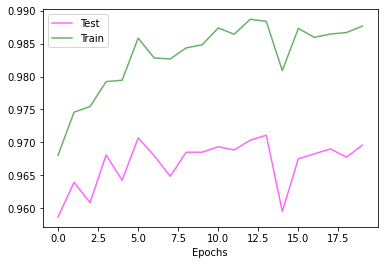

In [ ]:
import matplotlib.pyplot as plt


plt.plot(scores_test1, color='magenta', alpha=0.6, label='Test')
plt.plot(scores_train1, color='green', alpha=0.6, label='Train')
plt.xlabel('Epochs')
plt.legend(loc='Accurarcy')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'Accurarcy'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


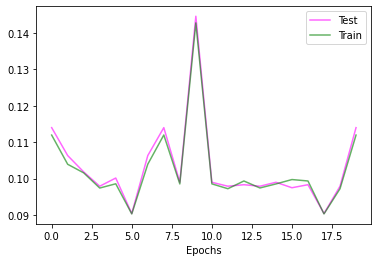

In [ ]:
plt.plot(scores_test2, color='magenta', alpha=0.6, label='Test')
plt.plot(scores_train2, color='green', alpha=0.6, label='Train')
plt.xlabel('Epochs')
plt.legend(loc='Accurarcy')
plt.show()